In [53]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.tutorial.open_dataset("air_temperature.nc")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
print(ds.air.attrs)

{'long_name': '4xDaily Air temperature at sigma level 995', 'units': 'degK', 'precision': np.int16(2), 'GRIB_id': np.int16(11), 'GRIB_name': 'TMP', 'var_desc': 'Air temperature', 'dataset': 'NMC Reanalysis', 'level_desc': 'Surface', 'statistic': 'Individual Obs', 'parent_stat': 'Other', 'actual_range': array([185.16, 322.1 ], dtype=float32)}


In [4]:
air_temp = ds["air"]
air_temp

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [5]:
air_temp.dims

('time', 'lat', 'lon')

In [6]:
#  southwestern Kansas, USA, near Garden City.
selected_ds = air_temp.sel(time="2013-01-01", lat=37.3, lon=260.0, method="nearest") 
selected_ds

<xarray.DataArray 'air' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    lat      float32 4B 37.5
    lon      float32 4B 260.0
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

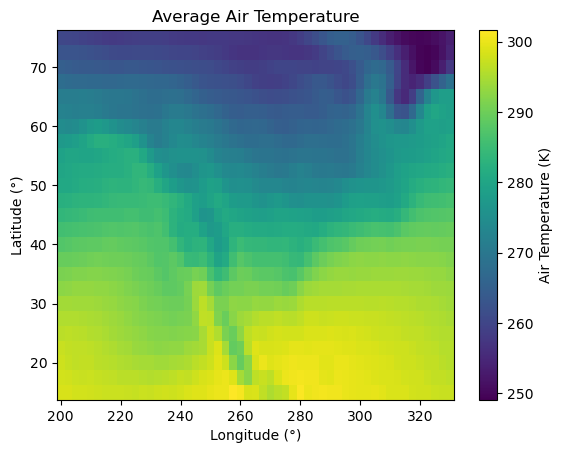

In [7]:
average_temp = air_temp.mean(dim="time")
average_temp.plot(cbar_kwargs={'label': 'Air Temperature (K)'})
plt.title("Average Air Temperature")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.savefig('../figures/average_air_temperature.png')
plt.show()

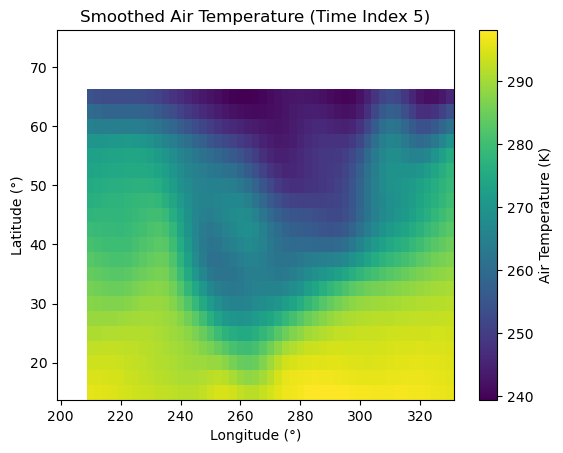

In [8]:
smoothed_snapshot = ds.air.isel(time=5).rolling(lat=5, lon=5).mean()
smoothed_snapshot.plot(cbar_kwargs={'label': 'Air Temperature (K)'})
plt.title("Smoothed Air Temperature (Time Index 5)")
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.savefig('../figures/smoothed_air_temperature.png')
plt.show()

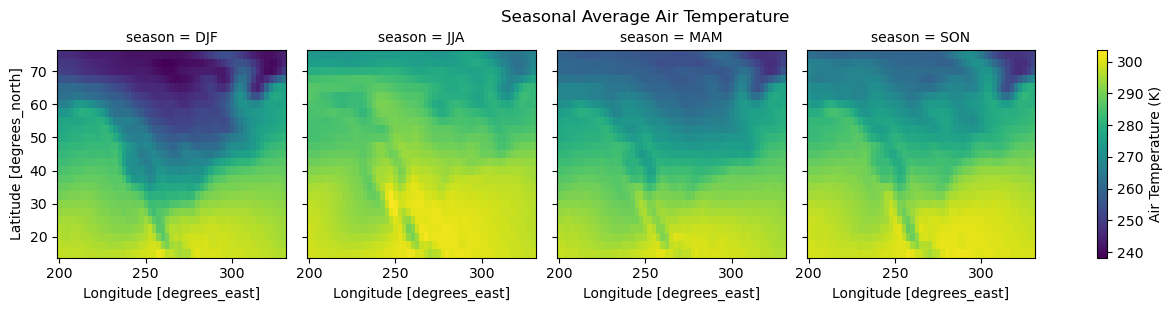

In [ ]:
seasonal_avg = air_temp.groupby("time.season").mean(dim="time")
seasonal_avg.plot(col="season", cmap="viridis", cbar_kwargs={'label': 'Air Temperature (K)'})
plt.suptitle("Seasonal Average Air Temperature", y=1.02)
plt.savefig('../figures/seasonal_average_air_temperature.png', bbox_inches='tight')
plt.show()

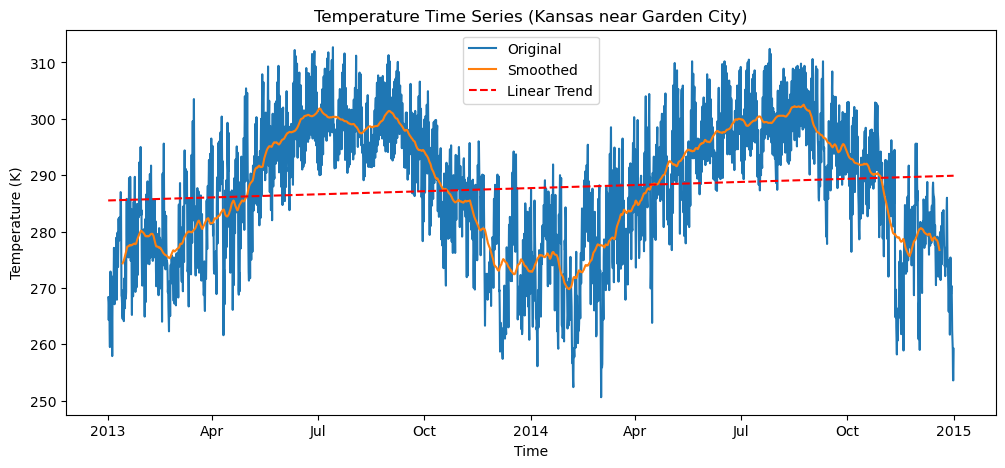

In [24]:
plt.figure(figsize=(12, 5))
air_temp_kansas = ds["air"].sel(lat=37.5, lon=260.0)
air_temp_kansas.plot(label="Original")

smoothed_temp = air_temp_kansas.rolling(time=100, center=True).mean()
smoothed_temp.plot(label="Smoothed")

time_index = np.arange(len(air_temp_kansas.time))
trend = np.poly1d(np.polyfit(time_index, air_temp_kansas.values, 1))
plt.plot(air_temp_kansas.time, trend(time_index), label='Linear Trend', color='red', linestyle='--')

plt.title("Temperature Time Series (Kansas near Garden City)")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.legend()
plt.savefig('../figures/temperature_time_series.png')
plt.show()

## Using Regional Arctic System Model (RASM) Xarray Tutorial Dataset

In [28]:
rasm_ds = xr.tutorial.open_dataset("rasm")
rasm_ds

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB ...
    yc       (y, x) float64 451kB ...
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 16MB ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

In [29]:
air_temperature = rasm_ds["Tair"]
air_temperature

<xarray.DataArray 'Tair' (time: 36, y: 205, x: 275)> Size: 16MB
[2029500 values with dtype=float64]
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB ...
    yc       (y, x) float64 451kB ...
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

In [ ]:
#  attributes, dimensions, and coordinates of Tair.
print(air_temperature.attrs)
print(air_temperature.dims)
print(air_temperature.coords)

{'units': 'C', 'long_name': 'Surface air temperature', 'type_preferred': 'double', 'time_rep': 'instantaneous'}
('time', 'y', 'x')
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB ...
    yc       (y, x) float64 451kB ...


In [175]:
subset = air_temperature.sel(time="1980-09-16")
subset_air = subset.where(abs(subset.yc - 70.0) < 0.1, drop=True)
time_slice = air_temperature.sel(time=slice("1980-09-16", "1980-12-16"))
time_slice_70 = time_slice.where(abs(time_slice.yc - 70.0) < 0.1, drop=True)
time_slice_70["time"] = time_slice_70.indexes["time"].to_datetimeindex()


C:\Users\Fredrick Kariuki M\AppData\Local\Temp\ipykernel_15640\2391454964.py:5: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  time_slice_70["time"] = time_slice_70.indexes["time"].to_datetimeindex()
C:\Users\Fredrick Kariuki M\AppData\Local\Temp\ipykernel_15640\2391454964.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_slice_70["time"] = time_slice_70.indexes["time"].to_datetimeindex()


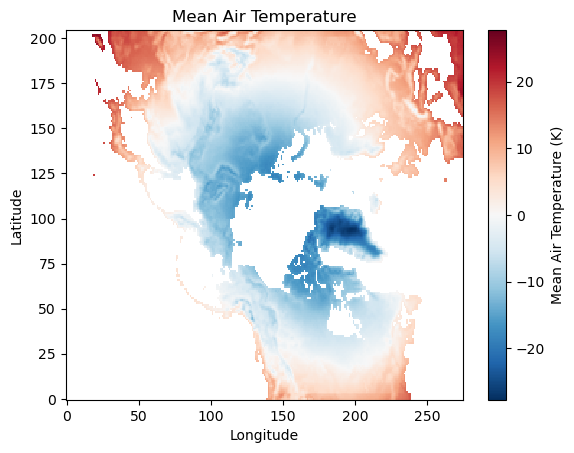

In [183]:
mean_temp = air_temperature.mean(dim="time")
mean_temp.plot(cbar_kwargs={'label': 'Mean Air Temperature (K)'})
plt.title("Mean Air Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('../figures/mean_air_temperature.png')
plt.show()

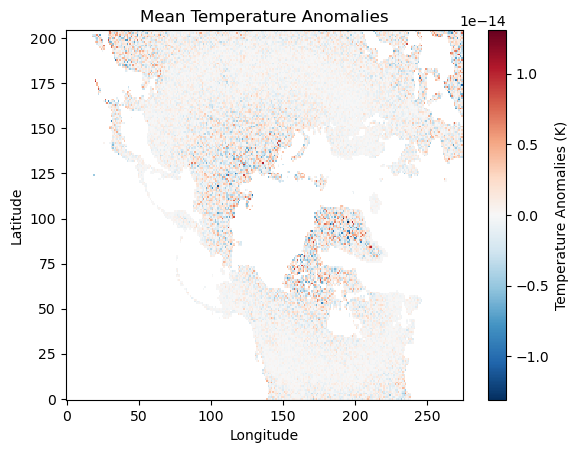

In [184]:
anomalies = air_temperature - mean_temp
anomalies.mean(dim="time").plot(cbar_kwargs={'label': 'Temperature Anomalies (K)'})
plt.title("Mean Temperature Anomalies")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('../figures/mean_temperature_anomalies.png')  
plt.show()


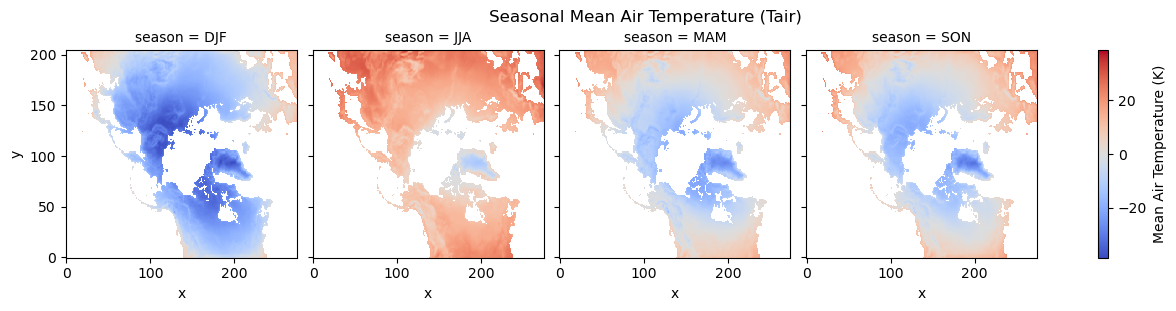

In [ ]:
#  seasonal mean temperature (Tair).
seasonal_mean = air_temperature.groupby("time.season").mean(dim="time")
seasonal_mean.plot(col="season", cmap="coolwarm", cbar_kwargs={'label': 'Mean Air Temperature (K)'})
plt.suptitle("Seasonal Mean Air Temperature (Tair)", y=1.02)
plt.savefig('../figures/seasonal_mean_air_temperature.png', bbox_inches='tight')
plt.show()  


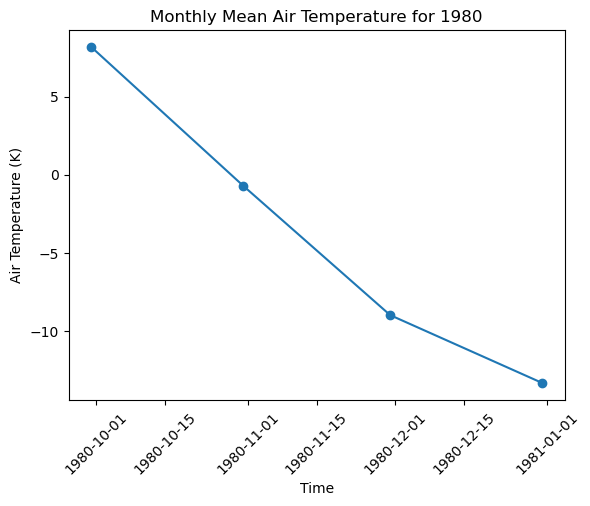

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [188]:
#  resampling for the monthly mean temperature for 1980.
air_temp1980 = air_temperature.sel(time=slice("1980-01-01", "1980-12-31"))
resampled_monthly_mean = air_temp1980.resample(time="ME").mean()
monthly_mean_1980 = resampled_monthly_mean.mean(dim=["y","x"])
time_dates = monthly_mean_1980.time.values.astype("datetime64[D]")

plt.plot(time_dates, monthly_mean_1980.values, marker='o', linestyle='-')
plt.title("Monthly Mean Air Temperature for 1980")
plt.xlabel("Time")
plt.ylabel("Air Temperature (K)")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 5))

In [ ]:
anomalies_float32 = anomalies.astype(np.float32)
file_name_out = "../data/tair_anomalies.nc"
anomalies_float32.to_netcdf(file_name_out)
loaded_anomalies = xr.load_dataset(file_name_out)
print(loaded_anomalies)


<xarray.Dataset> Size: 9MB
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float32 8MB nan nan nan nan ... 7.9 7.801 7.671 7.519
